In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [2]:
# load csv files
batting = pd.read_csv('./core/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
# extract specific data from loaded csv's
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
batting_by_years = batting[batting['yearID'].isin(years)]

In [4]:
batting_by_years = batting_by_years.groupby(['playerID', 'yearID', 'teamID'], as_index=False).sum()
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2007,CHA,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2008,BOS,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,2009,SEA,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2010,SEA,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2012,NYA,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2013,NYN,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2015,ATL,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
7,abadfe01,2010,HOU,1,22,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
8,abadfe01,2011,HOU,1,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,abadfe01,2012,HOU,1,37,7,0,1,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0


In [5]:
batting_by_years.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000
mean,2012.090129,1.085901,49.098392,116.901864,15.146243,30.084043,5.979502,0.620844,3.487733,14.427071,1.997310,0.751842,10.773877,25.274934,0.779579,1.141375,0.977964,0.901928,2.634104
std,3.176328,0.298813,45.239775,178.353290,25.608784,49.132340,10.176789,1.524533,7.187889,25.207698,5.692988,1.839293,19.093810,37.822372,2.277744,2.503591,2.115748,1.789872,4.695903
min,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,1.000000,32.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,1.000000,72.000000,170.000000,19.000000,41.000000,8.000000,0.000000,3.000000,18.000000,1.000000,1.000000,14.000000,36.500000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2017.000000,6.000000,163.000000,716.000000,143.000000,238.000000,56.000000,23.000000,59.000000,156.000000,78.000000,23.000000,143.000000,223.000000,44.000000,30.000000,20.000000,15.000000,32.000000


In [6]:
batting_by_years.shape

(15611, 21)

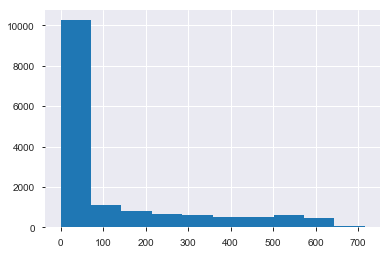

In [7]:
batting_by_years['AB'].hist()

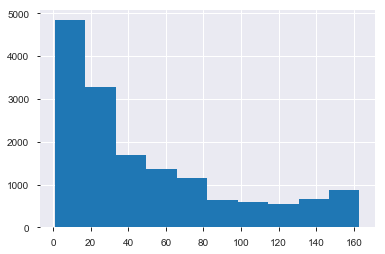

In [8]:
batting_by_years['G'].hist()

In [9]:
# filter to include only players with more than 20 games played and 20 at-bats
batting_by_years = batting_by_years[(batting_by_years['G'] >= 20) & 
                                    (batting_by_years['AB'] >= 20)]
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0


In [10]:
# # define a function that makes sure that only players that are in all five years are included
# def find_players_in_all_years(records):
#     # create list with all playerID's
#     list_of_IDs = list(records['playerID'])
#     all_years = set()
    
#     # iterate through list of ID's and count how many times it occurs in the list
#     for player in list_of_IDs:
#         if (list_of_IDs.count(player)) == len(years):
#             all_years.add(player)
            
#     # return dataframe with players in all desired years
#     return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
# batting_by_years_agg = find_players_in_all_years(batting_by_years)
# batting_by_years_agg.head(20)

In [12]:
batting_by_years.shape

(6766, 21)

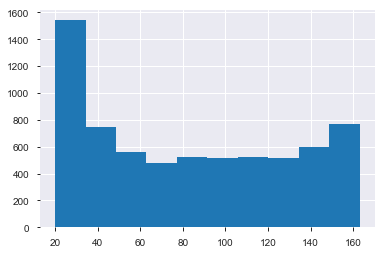

In [13]:
batting_by_years['G'].hist()

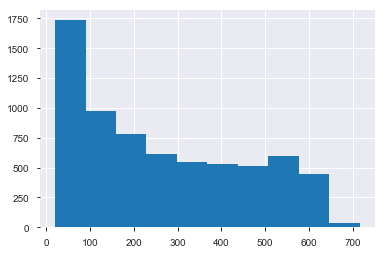

In [14]:
batting_by_years['AB'].hist()

In [15]:
# sns.pairplot(batting_by_years_agg)

In [16]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut'])

In [17]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [18]:
# join batting dataframe with other relavent info from people
batting_by_years = batting_by_years.join(people, on='playerID', how='inner')

In [19]:
batting_by_years.isnull().sum()

playerID     0
yearID       0
teamID       0
stint        0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
dtype: int64

In [20]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [21]:
# convert bats and throws columns
batting_by_years['throws_R'] = batting_by_years['throws'].apply(bats_throws)
batting_by_years['bats_R'] = batting_by_years['bats'].apply(bats_throws)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0


In [22]:
# create column for batting average
batting_by_years['AVE'] = batting_by_years['H'] / batting_by_years['AB']

In [23]:
# compute plate appearances and on base percentage 
plate_appearances = batting_by_years['AB'] + batting_by_years['BB'] + batting_by_years['SF'] + batting_by_years['HBP']
batting_by_years['OBP'] = (batting_by_years['H'] + batting_by_years['BB'] + batting_by_years['HBP']) / plate_appearances

In [24]:
# create slugging percent column
single = ((batting_by_years['H'] - batting_by_years['2B']) - batting_by_years['3B']) - batting_by_years['HR']
batting_by_years['Slug_Percent'] = ((batting_by_years['HR'] * 4) +
                                        (batting_by_years['3B'] * 3) +
                                        (batting_by_years['2B'] * 2) +
                                        single) / batting_by_years['AB']

In [25]:
# create on base plus slugging percent column
hr = batting_by_years['HR'] * 4
triple = batting_by_years['3B'] * 3
double = batting_by_years['2B'] * 2
batting_by_years['OPS'] = batting_by_years['OBP'] + batting_by_years['Slug_Percent']

In [26]:
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572


In [27]:
batting_by_years.isnull().sum()

playerID        0
yearID          0
teamID          0
stint           0
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS              0
BB              0
SO              0
IBB             0
HBP             0
SH              0
SF              0
GIDP            0
nameFirst       0
nameLast        0
bats            0
throws          0
debut           0
throws_R        0
bats_R          0
AVE             0
OBP             0
Slug_Percent    0
OPS             0
dtype: int64

In [28]:
from datetime import datetime

In [29]:
# convert debut to datetime
batting_by_years['debut'] = pd.to_datetime(batting_by_years['debut'])

In [30]:
# create new columns for debutYear and finalYear 
batting_by_years['debutYear'] = pd.to_numeric(batting_by_years['debut'].dt.strftime('%Y'), errors='coerce')
batting_by_years['currentYear'] = batting_by_years['yearID'] 
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014


In [31]:
# create a years in the league up to that point column
batting_by_years['YRSPRO'] = batting_by_years['currentYear'] - batting_by_years['debutYear']

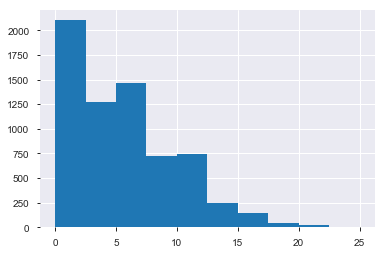

In [32]:
batting_by_years['YRSPRO'].hist()

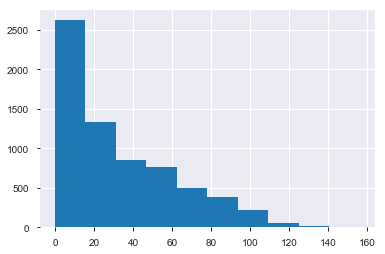

In [33]:
batting_by_years['RBI'].hist()

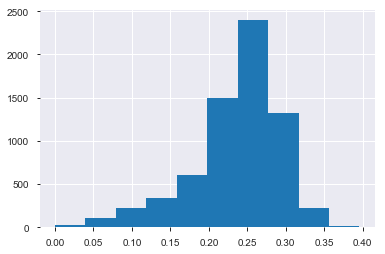

In [34]:
batting_by_years['AVE'].hist()

In [35]:
batting_by_years._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO'],
      dtype='object')

In [36]:
change_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
               'AVE', 'OBP', 'Slug_Percent', 'OPS']

percent_change = batting_by_years[change_cols].pct_change().replace(np.inf, np.nan)

In [37]:
percent_change.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVE,OBP,Slug_Percent,OPS
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,-0.028571,-0.276316,-0.375000,0.133333,0.666667,NaN,0.00,0.000000,-0.285714,1.000000,-0.500000,0.045455,NaN,0.000000,NaN,NaN,-1.000000,0.566061,0.427297,0.612121,0.532785
18,3.647059,10.000000,11.300000,9.058824,7.000000,NaN,7.00,19.200000,4.000000,3.000000,83.000000,4.000000,NaN,0.500000,-1.0,6.000000,NaN,-0.085561,0.088841,-0.126623,-0.040500
19,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.20,0.25,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,NaN,-0.666667,NaN,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.25,-0.25,0.030000,0.363636,-0.272727,0.287671,0.036697,2.5,0.000000,NaN,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930


In [38]:
# combine batting_by_years_agg and percent_change into a single dataframe
batter_and_change = pd.concat([batting_by_years, percent_change.rename(columns={
    'G': 'G_chg', 
    'AB': 'AB_chg', 
    'R': 'R_chg', 
    'H': 'H_chg', 
    '2B': '2B_chg', 
    '3B': '3B_chg', 
    'HR': 'HR_chg', 
    'RBI': 'RBI_chg', 
    'SB': 'SB_chg',
    'CS': 'CS_chg', 
    'BB': 'BB_chg', 
    'SO': 'SO_chg', 
    'IBB': 'IBB_chg', 
    'HBP': 'HBP_chg', 
    'SH': 'SH_chg', 
    'SF': 'SF_chg', 
    'GIDP': 'GIDP_chg',
    'AVE': 'AVE_chg', 
    'OBP': 'OBP_chg', 
    'Slug_Percent': 'Slug_chg', 
    'OPS': 'OPS_chg'
})], axis=1)

In [39]:
# fill nan values with 0
batter_and_change.fillna(0, inplace=True)

In [40]:
batter_and_change.shape

(6766, 56)

In [41]:
# batter_and_change.to_csv('batter_and_change.csv')

In [42]:
batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,3.647059,10.000000,11.300000,9.058824,7.000000,0.000000,7.000000,19.200000,4.000000,3.000000,83.000000,4.000000,0.000000,0.500000,-1.0,6.000000,0.000000,-0.085561,0.088841,-0.126623,-0.040500
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.858974,3.180451,5.666667,4.333333,2.888889,0.000000,35.000000,6.642857,2.000000,0.000000,1.550000,5.238095,0.000000,0.000000,0.0,1.000000,3.666667,0.275779,0.119032,0.716986,0.416431


In [43]:
batter_and_change['bats_R'].value_counts(normalize=True)

1    0.553355
0    0.446645
Name: bats_R, dtype: float64

In [44]:
batter_and_change[(batter_and_change['teamID'] == 'CHN') & (batter_and_change['currentYear'] == 2016)]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
213,almoral01,2016,CHN,1,47,112,14,31,9,1,3,14.0,0.0,0.0,5,20.0,0.0,0.0,0.0,0.0,5.0,Albert,Almora,R,R,2016-06-07,1,1,0.276786,0.307692,0.455357,0.763049,2016,2016,0,0.382353,0.056604,0.555556,0.240000,1.250000,0.000000,2.000000,0.555556,-1.000000,-1.000000,-0.166667,0.052632,0.000000,0.000000,0.000000,-1.000000,1.500000,0.173571,0.121588,0.508371,0.324226
443,arrieja01,2016,CHN,1,31,65,7,17,2,1,2,7.0,0.0,0.0,4,28.0,0.0,0.0,1.0,0.0,1.0,Jake,Arrieta,R,R,2010-06-10,1,1,0.261538,0.304348,0.415385,0.719732,2010,2016,6,-0.060606,-0.177215,0.400000,0.416667,1.000000,0.000000,0.000000,2.500000,0.000000,0.000000,3.000000,-0.377778,0.000000,0.000000,-0.666667,0.000000,0.000000,0.721795,0.872910,0.562637,0.680351
596,baezja01,2016,CHN,1,142,421,50,115,19,1,14,59.0,12.0,3.0,15,108.0,3.0,11.0,1.0,2.0,8.0,Javier,Baez,R,R,2014-08-05,1,1,0.273159,0.314031,0.422803,0.736834,2014,2016,2,4.071429,4.539474,11.500000,4.227273,2.166667,0.000000,13.000000,13.750000,11.000000,0.500000,2.750000,3.500000,2.000000,0.000000,0.000000,0.000000,0.000000,-0.056359,-0.033750,0.036549,0.005375
1725,bryankr01,2016,CHN,1,155,603,121,176,35,3,39,102.0,8.0,5.0,75,154.0,5.0,18.0,0.0,3.0,3.0,Kris,Bryant,R,R,2015-04-17,1,1,0.291874,0.384835,0.553897,0.938733,2015,2016,1,0.026490,0.078712,0.390805,0.142857,0.129032,-0.400000,0.500000,0.030303,-0.384615,0.250000,-0.025974,-0.226131,0.000000,1.000000,0.000000,-0.400000,-0.571429,0.059465,0.042263,0.134170,0.094601
2804,coghlch01,2016,CHN,2,48,103,21,26,7,2,1,16.0,1.0,0.0,22,26.0,2.0,2.0,0.0,1.0,2.0,Chris,Coghlan,L,R,2009-05-08,1,0,0.252427,0.390625,0.388350,0.778975,2009,2016,7,-0.675676,-0.765909,-0.671875,-0.763636,-0.720000,-0.666667,-0.937500,-0.609756,-0.909091,-1.000000,-0.620690,-0.723404,-0.666667,-0.333333,-1.000000,0.000000,-0.750000,0.009709,0.146747,-0.123724,-0.006181
2937,contrwi01,2016,CHN,1,76,252,33,71,14,1,12,35.0,2.0,2.0,26,67.0,0.0,4.0,0.0,1.0,7.0,Willson,Contreras,R,R,2016-06-17,1,1,0.281746,0.356890,0.488095,0.844986,2016,2016,0,2.619048,7.129032,15.500000,7.875000,0.000000,0.000000,0.000000,10.666667,0.000000,-0.333333,0.000000,12.400000,0.000000,0.000000,0.000000,0.000000,6.000000,0.091766,0.382951,0.891369,0.637160
4570,fowlede01,2016,CHN,1,125,456,84,126,25,7,13,48.0,13.0,4.0,79,124.0,0.0,11.0,1.0,4.0,3.0,Dexter,Fowler,B,R,2008-09-02,1,0,0.276316,0.392727,0.447368,0.840096,2008,2016,8,-0.198718,-0.234899,-0.176471,-0.154362,-0.137931,-0.125000,-0.235294,0.043478,-0.350000,-0.428571,-0.059524,-0.194805,-1.000000,1.200000,-0.500000,0.333333,-0.250000,0.105263,0.135279,0.088292,0.109764
5862,hammeja01,2016,CHN,1,35,65,6,16,3,0,0,7.0,0.0,0.0,1,24.0,0.0,0.0,3.0,0.0,0.0,Jason,Hammel,R,R,2006-04-11,1,1,0.246154,0.257576,0.292308,0.549883,2006,2016,10,0.093750,0.000000,0.000000,0.454545,2.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.454545,0.438131,0.583333,0.511832
6187,hendrky01,2016,CHN,1,32,58,1,8,0,0,0,2.0,0.0,0.0,1,29.0,0.0,1.0,8.0,0.0,0.0,Kyle,Hendricks,R,R,2014-07-10,1,1,0.137931,0.166667,0.137931,0.304598,2014,2016,2,0.000000,-0.033333,-0.500000,1.666667,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.208333,0.000000,0.000000,1.666667,0.000000,-1.000000,1.758621,1.541667,1.068966,1.303363
6377,heywaja01,2016,CHN,1,142,530,61,122,27,1,7,49.0,11.0,4.0,54,93.0,0.0,5.0,1.0,2.0,12.0,Jason,Heyward,L,L,2010-04-05,0,0,0.230189,0.306261,0.324528,0.630789,2010,2016,6,-0.077922,-0.031079,-0.227848,-0.237500,-0.181818,-0.750000,-0.461538,-0.183333,-0.521739,0.333333,-0.035714,0.033333,-1.000000,1.500000,0.000000,-0.333333,-0.076923,-0.213042,-0.145842,-0.260346,-0.208853


In [45]:
attributes = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR',
            'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 
            'SH', 'SF', 'GIDP', 'throws_R', 
            'bats_R', 'OBP', 'Slug_Percent', 'OPS', 
            'YRSPRO', 'G_chg', 'AB_chg', 'R_chg', 'H_chg',
            '2B_chg', '3B_chg', 'HR_chg', 'RBI_chg', 'SB_chg', 
            'CS_chg', 'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 
            'SH_chg', 'SF_chg', 'GIDP_chg',
            'OBP_chg', 'Slug_chg', 'OPS_chg']

In [46]:
# create dataframe without target
data_attributes = batter_and_change[attributes]
data_attributes.head(20)

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,throws_R,bats_R,OBP,Slug_Percent,OPS,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,OBP_chg,Slug_chg,OPS_chg
16,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,1,1,0.237500,0.315789,0.553289,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
17,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,1,1,0.338983,0.509091,0.848074,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.427297,0.612121,0.532785
18,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,1,0,0.369099,0.444628,0.813727,11,3.647059,10.000000,11.300000,9.058824,7.000000,0.000000,7.000000,19.200000,4.000000,3.000000,83.000000,4.000000,0.000000,0.500000,-1.0,6.000000,0.000000,0.088841,-0.126623,-0.040500
19,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,1,0,0.371345,0.471264,0.842609,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.006086,0.059907,0.035494
20,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,1,0,0.389805,0.435169,0.824974,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,0.049711,-0.076593,-0.020930
21,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,1,0,0.352324,0.434555,0.786879,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.096154,-0.001410,-0.046177
22,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,1,0,0.352740,0.364542,0.717282,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,0.001180,-0.161115,-0.088447
24,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,1,0,0.360870,0.343590,0.704459,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,0.023048,-0.057475,-0.017876
25,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,1,0,0.341935,0.338346,0.680281,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,-0.052468,-0.015262,-0.034321
26,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,1,1,0.382637,0.580935,0.963572,0,0.858974,3.180451,5.666667,4.333333,2.888889,0.000000,35.000000,6.642857,2.000000,0.000000,1.550000,5.238095,0.000000,0.000000,0.0,1.000000,3.666667,0.119032,0.716986,0.416431


In [47]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss = StandardScaler()
X_sc = ss.fit_transform(data_attributes)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [68]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X_sc)
    s_score = metrics.silhouette_score(X_sc, l)
    s_score_dict[i] = [s_score]
    
s_score_dict

{2: [0.26673570037097816],
 3: [0.2642852322485044],
 4: [0.11406960578876926],
 5: [0.10465303829483436],
 6: [0.10716719524312311],
 7: [0.11264849929011907],
 8: [0.11184382144527565],
 9: [0.11118564682922139],
 10: [0.09474560898347731]}

In [69]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
distances = kmeans_model.fit_transform(X_sc)
labels = kmeans_model.labels_

In [70]:
labels

array([3, 3, 2, ..., 4, 3, 4])

In [71]:
batter_and_change['KMeans_label'] = labels
attributes.append('KMeans_label')

batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785,3
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,3.647059,10.000000,11.300000,9.058824,7.000000,0.000000,7.000000,19.200000,4.000000,3.000000,83.000000,4.000000,0.000000,0.500000,-1.0,6.000000,0.000000,-0.085561,0.088841,-0.126623,-0.040500,2
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494,1
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930,1
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177,1
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447,1
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876,3
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,3
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.858974,3.180451,5.666667,4.333333,2.888889,0.000000,35.000000,6.642857,2.000000,0.000000,1.550000,5.238095,0.000000,0.000000,0.0,1.000000,3.666667,0.275779,0.119032,0.716986,

In [72]:
batter_and_change['KMeans_label'].value_counts()

3    2439
4    1775
1    1283
0     996
2     273
Name: KMeans_label, dtype: int64

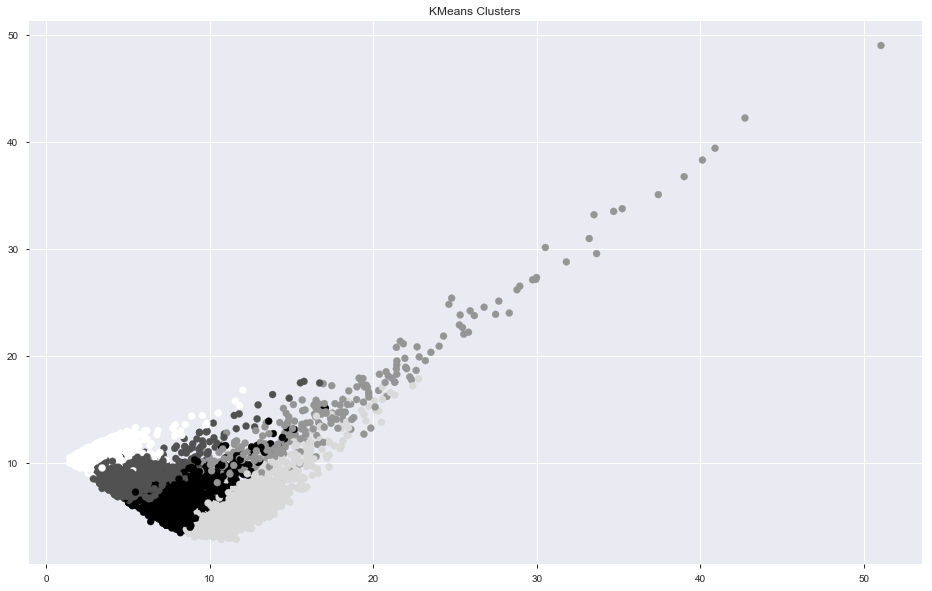

In [73]:
# create a scatter plot using labels from KMeans model as color
plt.figure(figsize=(16,10))
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [57]:
batter_and_change[batter_and_change['KMeans_label'] == 2].describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.00000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.0
mean,2010.208791,1.021978,117.227106,407.157509,57.047619,110.765568,22.300366,2.681319,13.194139,53.615385,8.410256,3.043956,38.637363,83.252747,2.699634,3.992674,1.981685,3.278388,8.846154,0.871795,0.556777,0.268938,0.334950,0.432906,0.767856,2006.322344,2010.208791,3.886447,3.296174,7.958341,16.195865,17.156406,9.662524,0.217338,3.218498,16.939164,1.46044,0.385226,12.854058,6.003751,0.139194,0.592186,0.168771,0.394383,2.963187,1.060800,1.003334,1.709145,1.300980,2.0
std,3.601010,0.170079,31.265697,136.754506,24.874566,42.342572,9.703200,2.641075,9.171710,25.912509,11.525555,3.278424,21.656331,35.266504,4.094190,3.740667,2.913526,2.339591,5.458917,0.334932,0.497678,0.031195,0.035390,0.066638,0.092867,6.676240,3.601010,4.277798,1.471512,4.201809,16.017777,16.635948,9.861979,1.071092,5.735441,18.760145,5.46844,1.439285,15.166076,5.545862,0.862219,1.672828,1.766878,1.188923,4.499802,1.672209,1.825419,2.723107,2.108036,0.0
min,2007.000000,1.000000,34.000000,81.000000,9.000000,23.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162338,0.212121,0.246753,0.458874,1986.000000,2007.000000,0.000000,0.062500,2.048387,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.00000,-1.000000,0.000000,-0.250000,-1.000000,-1.000000,-1.000000,0.000000,-0.800000,-0.458874,-0.309211,-0.336810,-0.294039,2.0
25%,2007.000000,1.000000,98.000000,294.000000,38.000000,77.000000,15.000000,1.000000,6.000000,34.000000,1.000000,1.000000,22.000000,57.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.251451,0.312611,0.387681,0.701762,2002.000000,2007.000000,1.000000,2.228571,5.000000,6.750000,7.250000,0.000000,0.000000,0.000000,5.400000,0.00000,0.000000,2.666667,3.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.227197,0.212972,0.366422,0.281595,2.0
50%,2009.000000,1.000000,121.000000,421.000000,54.000000,114.000000,21.000000,2.000000,12.000000,51.000000,4.000000,2.000000,35.000000,77.000000,1.000000,3.000000,1.000000,3.000000,8.000000,1.000000,1.000000,0.268817,0.334107,0.427574,0.765162,2006.000000,2009.000000,2.000000,3.235294,7.078947,12.000000,12.000000,7.333333,0.000000,0.000000,11.833333,0.00000,0.000000,7.857143,4.333333,0.000000,0.000000,0.000000,0.000000,0.500000,0.542763,0.475694,0.827745,0.674988,2.0
75%,2013.000000,1.000000,144.000000,517.000000,74.000000,140.000000,29.000000,4.000000,18.000000,68.000000,11.000000,4.000000,50.000000,108.000000,4.000000,5.000000,3.000000,5.000000,12.000000,1.000000,1.000000,0.288998,0.354376,0.471132,0.821516,2012.000000,2013.000000,6.000000,4.153846,9.365854,21.500000,21.750000,14.000000,0.000000,5.500000,21.250000,0.00000,0.000000,16.666667,6.785714,0.000000,0.000000,0.000000,0.000000,4.000000,1.110345,1.063918,1.701903,1.367499,2.0
max,2017.000000,3.000000,162.000000,681.000000,143.000000,238.000000,50.000000,12.000000,54.000000,156.000000,78.000000,23.000000,132.000000,208.000000,43.000000,23.000000,20.000000,13.000000,27.000000,1.000000,1.000000,0.351032,0.480084,0.650794,1.067256,2017.000000,2017.000000,21.000000,7.000000,26.238095,102.000000,11